<b>Mini Project</b><br>
<b>Student Name & Student ID:</b> <br>
    1. RAUDHATUL SAADAH BINTI ABDUL RAZAK - 52213122400 <br>
    2. PUTRI NURSYAZANA BINTI MUSTAFA KAMAL - 52213122010 <br>
    3. WAN NURUL EZZAH BINTI SAHARDI - 52213123227 <br>
<br>
<b>Domain</b> <br>
Animal Subspecies - <i>Rabbit</i>

Use the same dataset as before

<b>2. Data Modelling </b>
<br>
2.1 Train Resnet50

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, average_precision_score
import time

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 17

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build model using ResNet50
def build_resnet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_resnet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_resnet_model.keras', monitor='val_loss', save_best_only=True)
csv_logger = CSVLogger('training_log_resnet50.csv', append=True)

start_time = time.time()
history_resnet50 = model.fit(
    train_generator,
    epochs=8,
    validation_data=validation_generator,
    callbacks=[checkpoint, csv_logger],
    verbose=1
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")


Found 5797 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Epoch 1/8
341/341 [==============================] - 143s 397ms/step - loss: 3.2108 - accuracy: 0.1444 - val_loss: 2.7475 - val_accuracy: 0.1010
Epoch 2/8
341/341 [==============================] - 130s 380ms/step - loss: 2.7099 - accuracy: 0.1735 - val_loss: 2.2988 - val_accuracy: 0.1458
Epoch 3/8
341/341 [==============================] - 130s 381ms/step - loss: 2.4110 - accuracy: 0.2068 - val_loss: 2.1381 - val_accuracy: 0.2684
Epoch 4/8
341/341 [==============================] - 130s 380ms/step - loss: 2.2581 - accuracy: 0.2308 - val_loss: 2.0473 - val_accuracy: 0.3181
Epoch 5/8
341/341 [==============================] - 129s 379ms/step - loss: 2.1632 - accuracy: 0.2620 - val_loss: 2.0178 - val_accuracy: 0.3269
Epoch 6/8
341/341 [==============================] - 130s 382ms/step - loss: 2.0814 - accuracy: 0.2832 - val_loss: 1.9190 - val_accuracy: 0.3494
E

Accuracy & mAP Resnet50

In [12]:
# Evaluate model
model.load_weights('best_resnet_model.keras')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

74/74 [==============================] - 9s 110ms/step
Accuracy: 0.31810897435897434
mAP: 0.28653495358072517


2.2 Train DenseNet121

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, average_precision_score
import time

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 15

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build model using DenseNet121
def build_densenet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_densenet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_densenet_model.keras', monitor='val_loss', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=True)

start_time = time.time()
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, csv_logger],
    verbose=1
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")


Found 5797 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Epoch 1/10
387/387 [==============================] - 141s 331ms/step - loss: 3.2382 - accuracy: 0.1170 - val_loss: 3.0785 - val_accuracy: 0.1643
Epoch 2/10
387/387 [==============================] - 122s 314ms/step - loss: 2.7183 - accuracy: 0.1413 - val_loss: 2.2102 - val_accuracy: 0.2059
Epoch 3/10
387/387 [==============================] - 121s 313ms/step - loss: 2.4235 - accuracy: 0.1834 - val_loss: 2.2458 - val_accuracy: 0.2324
Epoch 4/10
387/387 [==============================] - 122s 315ms/step - loss: 2.2739 - accuracy: 0.2092 - val_loss: 2.1211 - val_accuracy: 0.2700
Epoch 5/10
387/387 [==============================] - 122s 315ms/step - loss: 2.2099 - accuracy: 0.2368 - val_loss: 2.0279 - val_accuracy: 0.2829
Epoch 6/10
387/387 [==============================] - 122s 315ms/step - loss: 2.1455 - accuracy: 0.2482 - val_loss: 1.9878 - val_accuracy: 0.

mAP & Accuracy DenseNet121


In [6]:
# Evaluate model
model.load_weights('best_densenet_model.keras')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

84/84 [==============================] - 8s 87ms/step
Accuracy: 0.2932692307692308
mAP: 0.27283183640341013


2.3 Train MobileNetV3

In [8]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_mobilenetv3(version='small', input_shape=(224, 224, 3), num_classes=1000):
    if version == 'small':
        base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, weights='imagenet', include_top=False)
    elif version == 'large':
        base_model = tf.keras.applications.MobileNetV3Large(input_shape=input_shape, weights='imagenet', include_top=False)
    else:
        raise ValueError("Version should be either 'small' or 'large'.")

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 25

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
val_ds = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the models
num_classes = train_ds.num_classes
mobilenetv3_small = build_mobilenetv3(version='small', input_shape=(img_height, img_width, 3), num_classes=num_classes)
mobilenetv3_large = build_mobilenetv3(version='large', input_shape=(img_height, img_width, 3), num_classes=num_classes)

# Callbacks
checkpoint_small = ModelCheckpoint('best_mobilenetv3_small_model.keras', monitor='val_loss', save_best_only=True)
checkpoint_large = ModelCheckpoint('best_mobilenetv3_large_model.keras', monitor='val_loss', save_best_only=True)
csv_logger_small = CSVLogger('training_log_mobilenetv3_small.csv', append=True)
csv_logger_large = CSVLogger('training_log_mobilenetv3_large.csv', append=True)

# Train the MobileNetV3 Small model for 8 epochs
start_time_small = time.time()
history_mobilenetv3_small = mobilenetv3_small.fit(
    train_ds,
    epochs=8,
    validation_data=val_ds,
    callbacks=[checkpoint_small, csv_logger_small],
    verbose=1
)
end_time_small = time.time()
training_time_small = end_time_small - start_time_small

# Train the MobileNetV3 Large model for 5 epochs
start_time_large = time.time()
history_mobilenetv3_large = mobilenetv3_large.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[checkpoint_large, csv_logger_large],
    verbose=1
)
end_time_large = time.time()
training_time_large = end_time_large - start_time_large

# Print training times
print(f"MobileNetV3 Small - Training time: {training_time_small} seconds")
print(f"MobileNetV3 Large - Training time: {training_time_large} seconds")


Found 5797 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Found 1248 images belonging to 10 classes.
Epoch 1/8
232/232 [==============================] - 47s 178ms/step - loss: 3.4248 - accuracy: 0.1082 - val_loss: 2.6627 - val_accuracy: 0.1154
Epoch 2/8
232/232 [==============================] - 38s 165ms/step - loss: 2.8725 - accuracy: 0.1547 - val_loss: 2.8614 - val_accuracy: 0.1202
Epoch 3/8
232/232 [==============================] - 40s 172ms/step - loss: 2.5609 - accuracy: 0.1829 - val_loss: 2.6530 - val_accuracy: 0.1202
Epoch 4/8
232/232 [==============================] - 40s 174ms/step - loss: 2.3583 - accuracy: 0.2036 - val_loss: 2.6521 - val_accuracy: 0.1202
Epoch 5/8
232/232 [==============================] - 41s 176ms/step - loss: 2.2212 - accuracy: 0.2389 - val_loss: 2.5930 - val_accuracy: 0.1202
Epoch 6/8
232/232 [==============================] - 40s 174ms/step - loss: 2.1595 - accuracy: 0.2487 - val_loss: 2.7090 - val_accuracy: 0.1202
Epoch 7

mAP & Accuracy MobileNetV3

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, average_precision_score

# Setup data
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load and evaluate MobileNetV3 Small
mobilenetv3_small = load_model('best_mobilenetv3_small_model.keras')
y_pred_small = mobilenetv3_small.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_small = np.argmax(y_pred_small, axis=1)

accuracy_small = accuracy_score(y_true, y_pred_labels_small)
mean_ap_small = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_small)

print(f"MobileNetV3 Small - Accuracy: {accuracy_small}")
print(f"MobileNetV3 Small - mAP: {mean_ap_small}")

# Load and evaluate MobileNetV3 Large
mobilenetv3_large = load_model('best_mobilenetv3_large_model.keras')
y_pred_large = mobilenetv3_large.predict(test_generator)
y_pred_labels_large = np.argmax(y_pred_large, axis=1)

accuracy_large = accuracy_score(y_true, y_pred_labels_large)
mean_ap_large = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_large)

print(f"MobileNetV3 Large - Accuracy: {accuracy_large}")
print(f"MobileNetV3 Large - mAP: {mean_ap_large}")


Found 1248 images belonging to 10 classes.
39/39 [==============================] - 4s 44ms/step
MobileNetV3 Small - Accuracy: 0.1201923076923077
MobileNetV3 Small - mAP: 0.10397858355018172
39/39 [==============================] - 5s 59ms/step
MobileNetV3 Large - Accuracy: 0.08974358974358974
MobileNetV3 Large - mAP: 0.109612707906108


3. Visualization

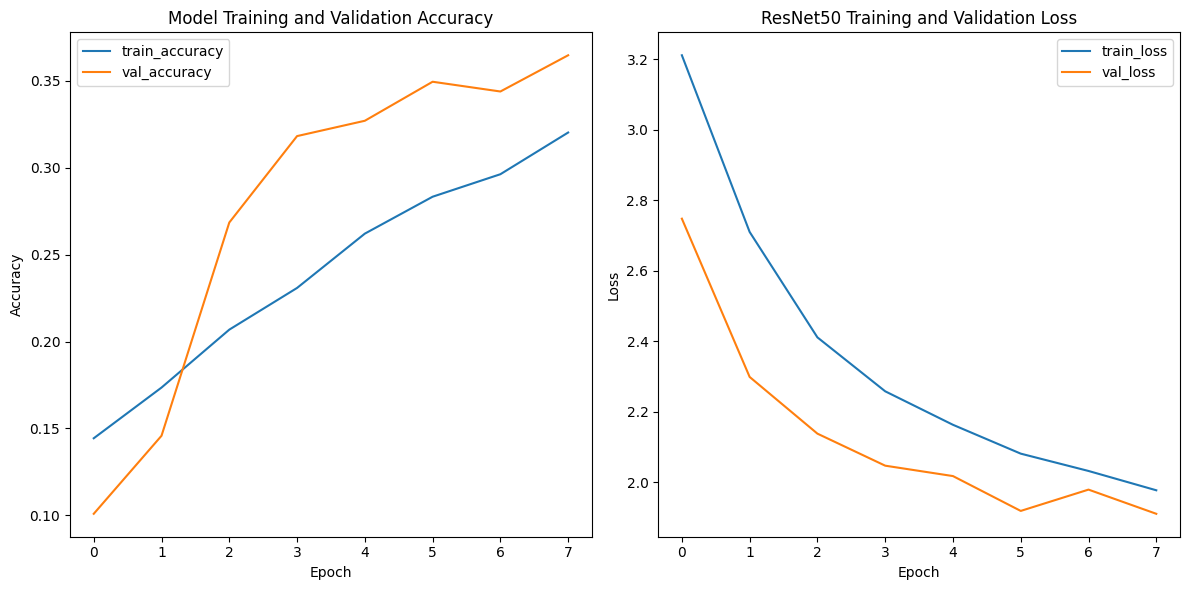

In [16]:
import pandas as pd

# Load the training log CSV file
log_file = 'training_log_resnet50.csv'
df = pd.read_csv(log_file)

import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['accuracy'], label='train_accuracy')
plt.plot(df['epoch'], df['val_accuracy'], label='val_accuracy')
plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['loss'], label='train_loss')
plt.plot(df['epoch'], df['val_loss'], label='val_loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


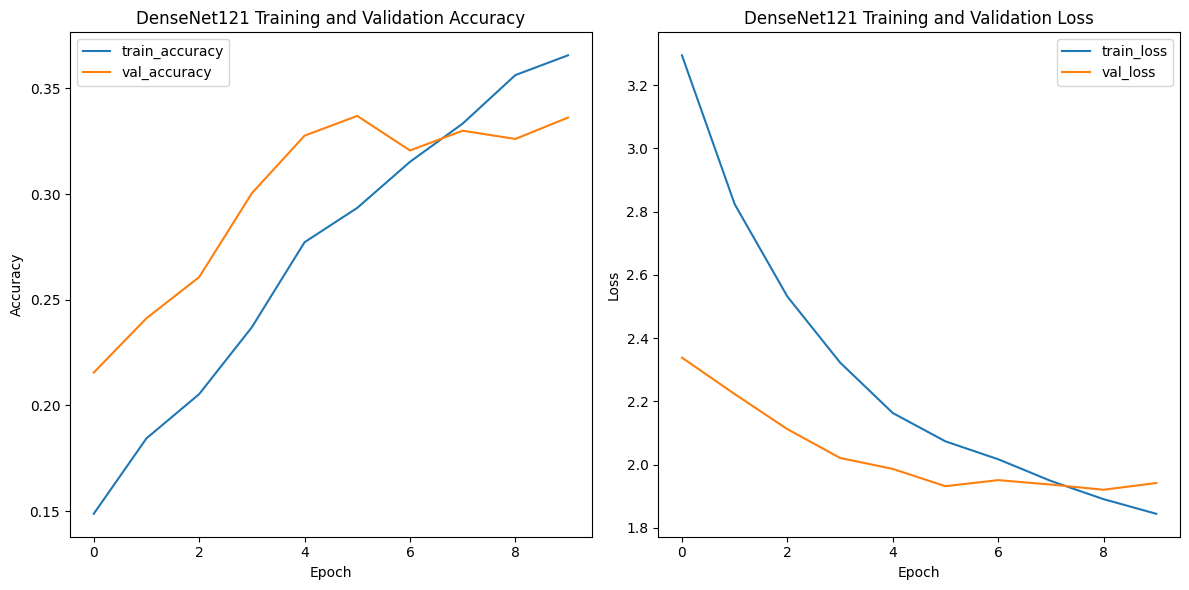

In [ ]:
# Plot training history for DenseNet121
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('DenseNet121 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('DenseNet121 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


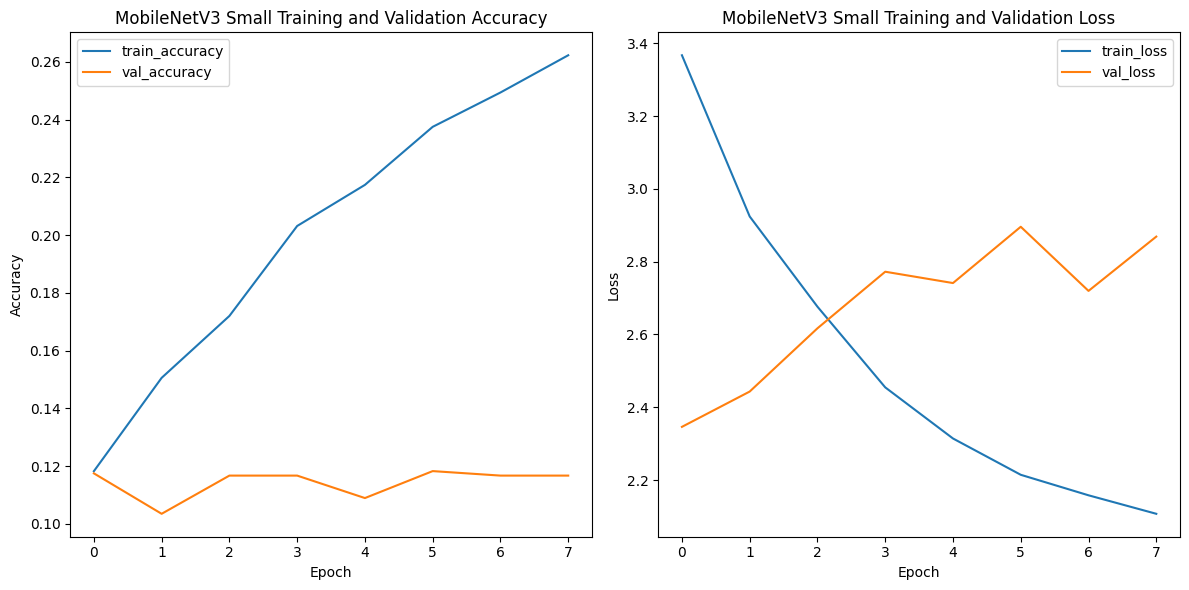

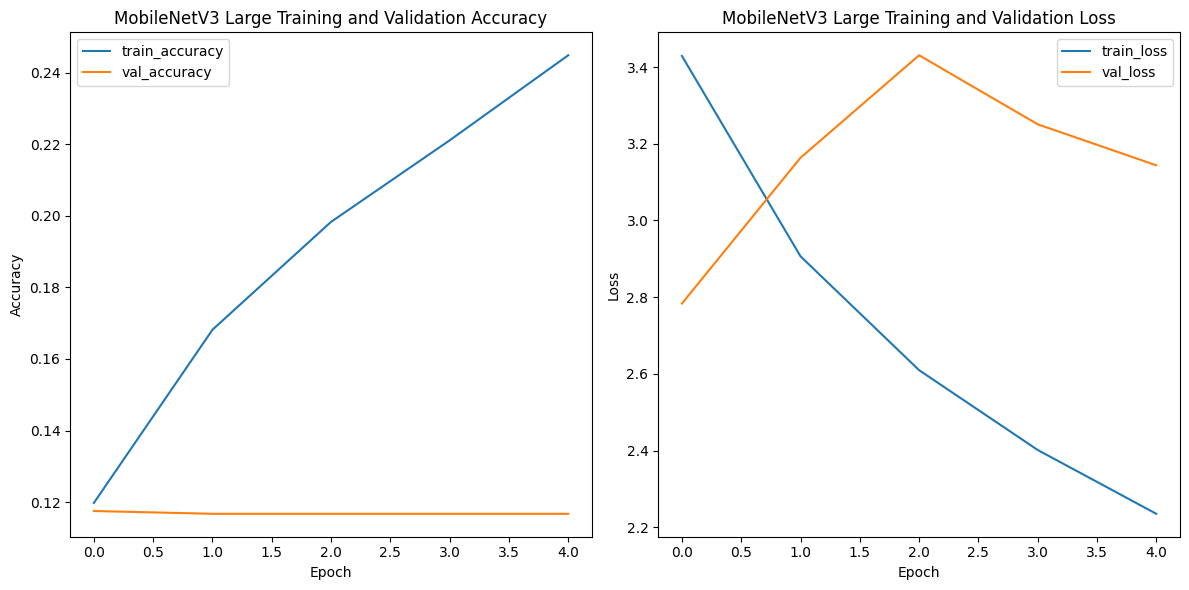

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy/loss
def plot_accuracy_loss(history, model_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot accuracy and loss for MobileNetV3 Small
plot_accuracy_loss(history_mobilenetv3_small, 'MobileNetV3 Small')

# Plot accuracy and loss for MobileNetV3 Large
plot_accuracy_loss(history_mobilenetv3_large, 'MobileNetV3 Large')


Found 1166 images belonging to 10 classes.
37/37 [==============================] - 217s 6s/step
Accuracy: 0.3902229845626072
mAP: 0.37774329780415294


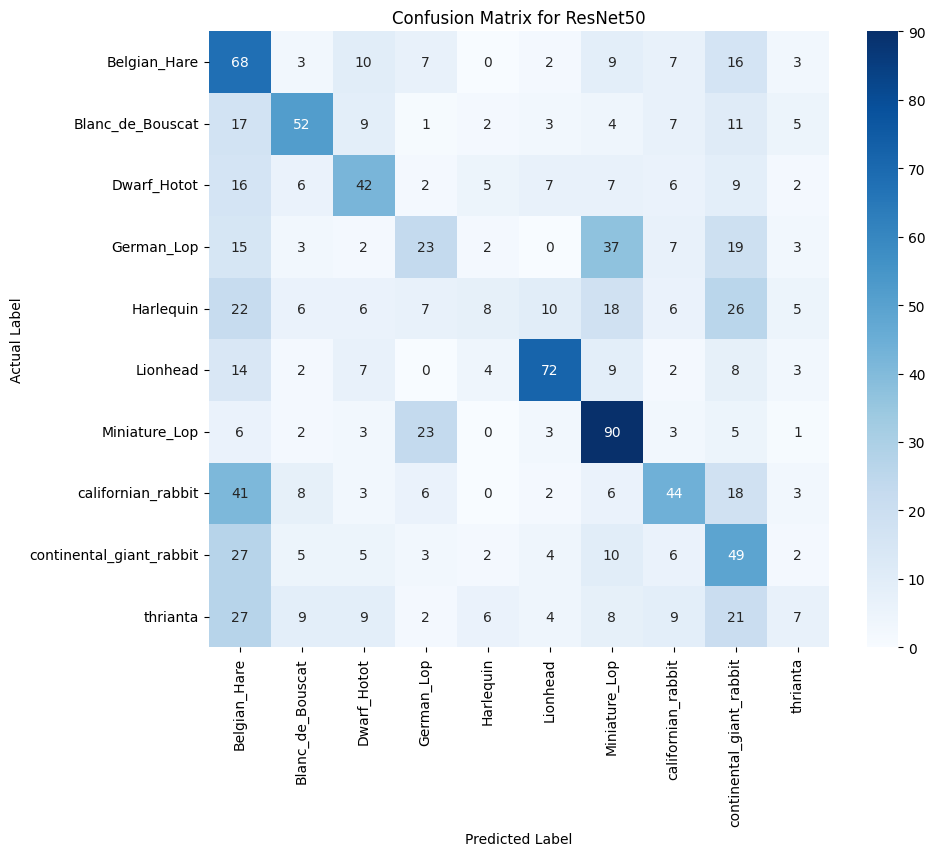

Classification Report for ResNet50
                          precision    recall  f1-score   support

            Belgian_Hare       0.27      0.54      0.36       125
        Blanc_de_Bouscat       0.54      0.47      0.50       111
             Dwarf_Hotot       0.44      0.41      0.42       102
              German_Lop       0.31      0.21      0.25       111
               Harlequin       0.28      0.07      0.11       114
                Lionhead       0.67      0.60      0.63       121
           Miniature_Lop       0.45      0.66      0.54       136
      californian_rabbit       0.45      0.34      0.39       131
continental_giant_rabbit       0.27      0.43      0.33       113
                thrianta       0.21      0.07      0.10       102

                accuracy                           0.39      1166
               macro avg       0.39      0.38      0.36      1166
            weighted avg       0.39      0.39      0.37      1166



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
resnet50 = tf.keras.models.load_model('best_resnet_model.keras')

# Predict using the loaded model
y_pred_resnet50 = resnet50.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_resnet50 = np.argmax(y_pred_resnet50, axis=1)

# Accuracy and mAP calculation
accuracy_resnet50 = accuracy_score(y_true, y_pred_labels_resnet50)
mean_ap_resnet50 = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_resnet50)

print(f"Accuracy: {accuracy_resnet50}")
print(f"mAP: {mean_ap_resnet50}")

# Confusion matrix
conf_mat_resnet50 = confusion_matrix(y_true, y_pred_labels_resnet50)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_resnet50, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for ResNet50')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for ResNet50')
print(classification_report(y_true, y_pred_labels_resnet50, target_names=test_generator.class_indices.keys()))


Found 1285 images belonging to 10 classes.
41/41 [==============================] - 235s 6s/step
Accuracy: 0.33229571984435796
mAP: 0.2982131408667276


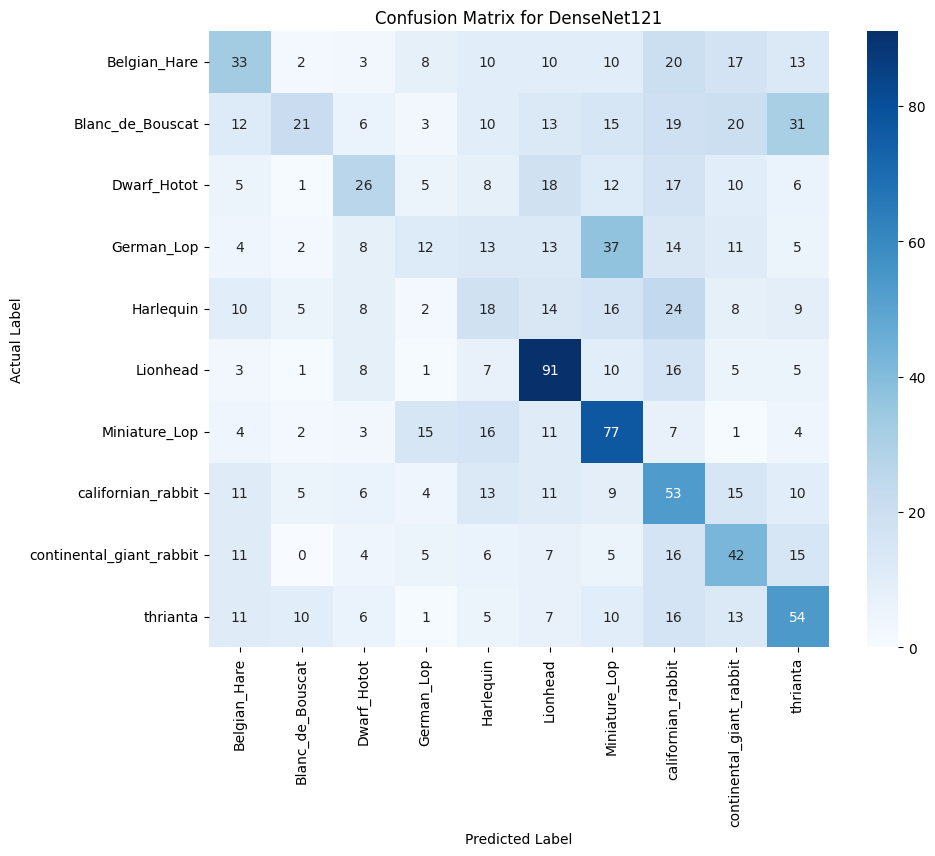

Classification Report
                          precision    recall  f1-score   support

            Belgian_Hare       0.32      0.26      0.29       126
        Blanc_de_Bouscat       0.43      0.14      0.21       150
             Dwarf_Hotot       0.33      0.24      0.28       108
              German_Lop       0.21      0.10      0.14       119
               Harlequin       0.17      0.16      0.16       114
                Lionhead       0.47      0.62      0.53       147
           Miniature_Lop       0.38      0.55      0.45       140
      californian_rabbit       0.26      0.39      0.31       137
continental_giant_rabbit       0.30      0.38      0.33       111
                thrianta       0.36      0.41      0.38       133

                accuracy                           0.33      1285
               macro avg       0.32      0.32      0.31      1285
            weighted avg       0.33      0.33      0.31      1285



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('best_densenet_model.keras')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for DenseNet121')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))


Found 1285 images belonging to 10 classes.
41/41 [==============================] - 15s 332ms/step
Accuracy: 0.11361867704280156
mAP: 0.0978142851505656


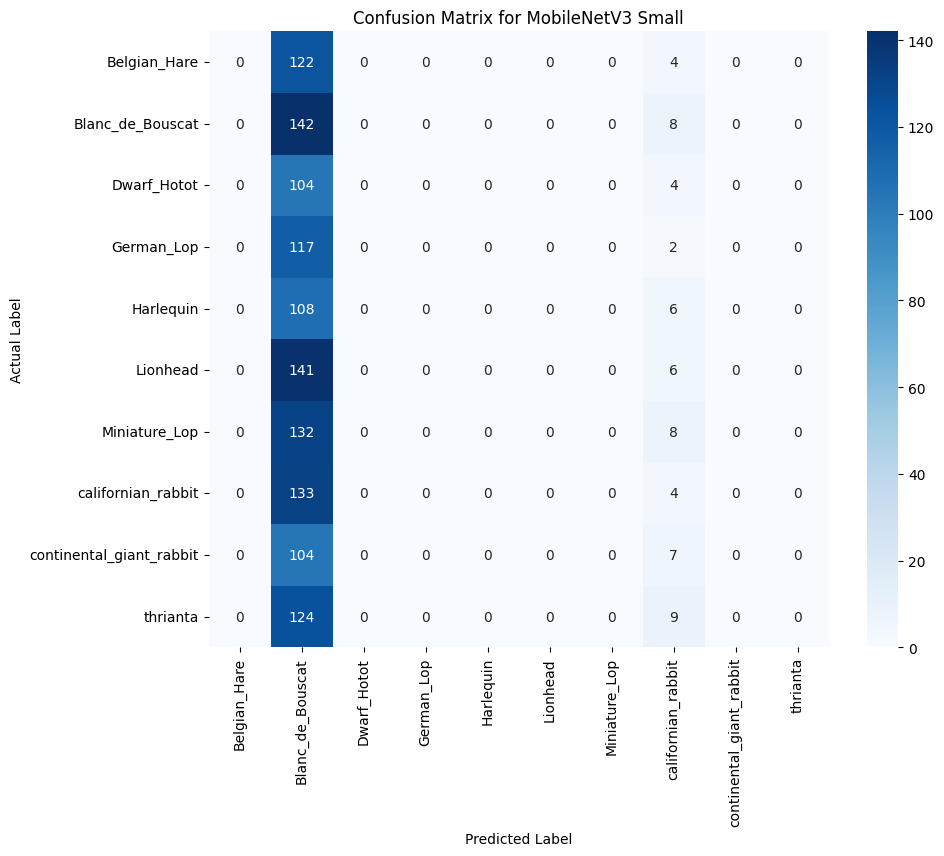

Classification Report for MobileNetV3 Small
                          precision    recall  f1-score   support

            Belgian_Hare       0.00      0.00      0.00       126
        Blanc_de_Bouscat       0.12      0.95      0.21       150
             Dwarf_Hotot       0.00      0.00      0.00       108
              German_Lop       0.00      0.00      0.00       119
               Harlequin       0.00      0.00      0.00       114
                Lionhead       0.00      0.00      0.00       147
           Miniature_Lop       0.00      0.00      0.00       140
      californian_rabbit       0.07      0.03      0.04       137
continental_giant_rabbit       0.00      0.00      0.00       111
                thrianta       0.00      0.00      0.00       133

                accuracy                           0.11      1285
               macro avg       0.02      0.10      0.02      1285
            weighted avg       0.02      0.11      0.03      1285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
mobilenetv3_small = tf.keras.models.load_model('best_mobilenetv3_small_model.keras')

# Predict using the loaded model
y_pred_mobilenetv3_small = mobilenetv3_small.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3_small = np.argmax(y_pred_mobilenetv3_small, axis=1)

# Accuracy and mAP calculation
accuracy_mobilenetv3_small = accuracy_score(y_true, y_pred_labels_mobilenetv3_small)
mean_ap_mobilenetv3_small = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_mobilenetv3_small)

print(f"Accuracy: {accuracy_mobilenetv3_small}")
print(f"mAP: {mean_ap_mobilenetv3_small}")

# Confusion matrix
conf_mat_mobilenetv3_small = confusion_matrix(y_true, y_pred_labels_mobilenetv3_small)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_mobilenetv3_small, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels_mobilenetv3_small, target_names=test_generator.class_indices.keys()))


Found 1285 images belonging to 10 classes.
41/41 [==============================] - 40s 931ms/step
Accuracy: 0.11517509727626458
mAP: 0.09904289425540201


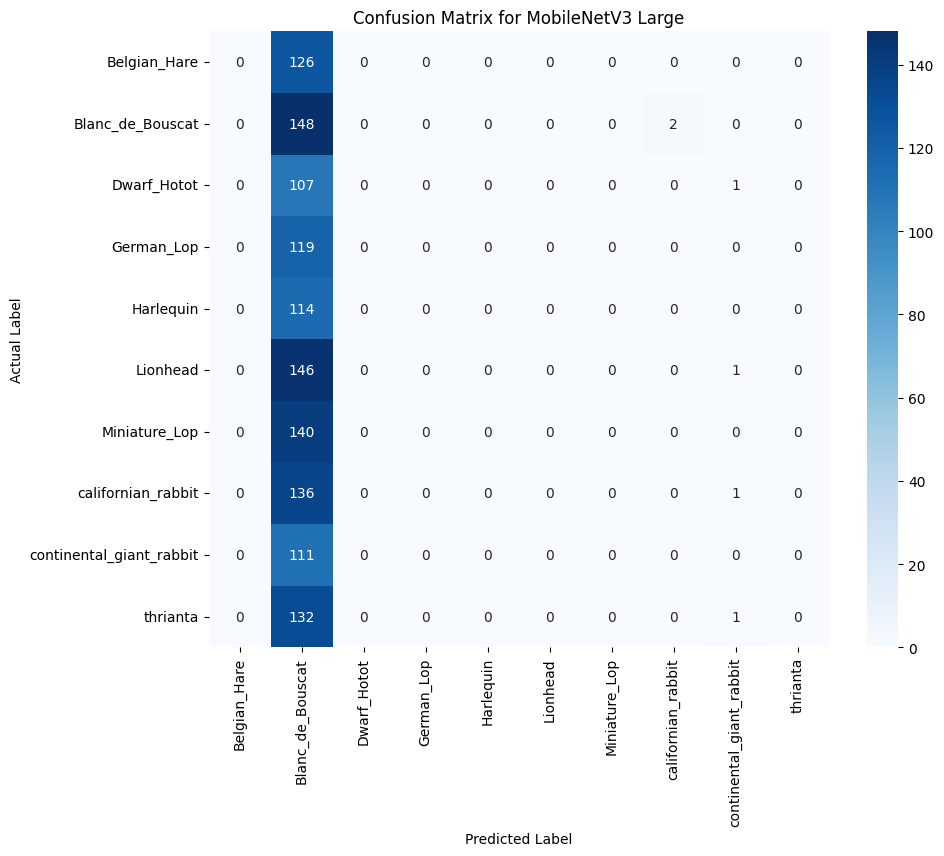

Classification Report for MobileNetV3 Large
                          precision    recall  f1-score   support

            Belgian_Hare       0.00      0.00      0.00       126
        Blanc_de_Bouscat       0.12      0.99      0.21       150
             Dwarf_Hotot       0.00      0.00      0.00       108
              German_Lop       0.00      0.00      0.00       119
               Harlequin       0.00      0.00      0.00       114
                Lionhead       0.00      0.00      0.00       147
           Miniature_Lop       0.00      0.00      0.00       140
      californian_rabbit       0.00      0.00      0.00       137
continental_giant_rabbit       0.00      0.00      0.00       111
                thrianta       0.00      0.00      0.00       133

                accuracy                           0.12      1285
               macro avg       0.01      0.10      0.02      1285
            weighted avg       0.01      0.12      0.02      1285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
mobilenetv3_large = tf.keras.models.load_model('best_mobilenetv3_large_model.keras')

# Predict using the loaded model
y_pred_mobilenetv3_large = mobilenetv3_large.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3_large = np.argmax(y_pred_mobilenetv3_large, axis=1)

# Accuracy and mAP calculation
accuracy_mobilenetv3_large = accuracy_score(y_true, y_pred_labels_mobilenetv3_large)
mean_ap_mobilenetv3_large = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_mobilenetv3_large)

print(f"Accuracy: {accuracy_mobilenetv3_large}")
print(f"mAP: {mean_ap_mobilenetv3_large}")

# Confusion matrix
conf_mat_mobilenetv3_large = confusion_matrix(y_true, y_pred_labels_mobilenetv3_large)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_mobilenetv3_large, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Large')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Large')
print(classification_report(y_true, y_pred_labels_mobilenetv3_large, target_names=test_generator.class_indices.keys()))


4. Conclusion

<b>DenseNet121:</b>
- Accuracy: 29.33%
- mAP: 27.28%

<b>ResNet50:</b>
- Accuracy: 31.81%
- mAP: 28.65%

<b>MobileNetV3 Small:</b>
- Accuracy: 12.02%
- mAP: 10.40%

<b>MobileNetV3 Large:</b>
- Accuracy: 8.97%
- mAP: 10.96%

ResNet50 offers balanced performance suitable for applications needing both computational efficiency and decent accuracy. It stands out for its robust performance metrics relative to its efficient training time, making it versatile across various scenarios.

DenseNet121 requires more training time but excels in tasks where achieving slightly higher performance justifies longer training times and ample computational resources. It's suitable for applications prioritizing accuracy over training efficiency.

MobileNetV3 Small demonstrates a lower accuracy but offers quick deployment with a short training time of 0.76 hours. It's ideal for applications on mobile or edge devices where training time and computational efficiency are critical.

MobileNetV3 Large provides slightly better accuracy than the Small version with a training time of 1.26 hours. It's suitable for applications needing moderate performance with reduced computational demands.

<B>Conclusion</b>
 ResNet50 stands out for its balanced performance with significant accuracy and moderate training time. DenseNet121 excels in accuracy but requires longer training times. MobileNetV3 Small and Large prioritize efficiency and quick deployment, making them suitable for resource-constrained environments. Choosing the appropriate model depends on the specific project requirements, available computational resources, and the desired balance between accuracy and training efficiency.